In [3]:
import pandas as pd
import numpy as np
import torch
from torch import optim as optim
from torch import nn as nn
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data.csv', )
df

,x,y
0,-0.250920,2.574699
1,0.901429,101.050273
2,0.463988,24.285346
3,0.197317,1.915087
4,-0.687963,-0.357155
...,...,...
95,-0.012409,1.652933
96,0.045466,5.649574
97,-0.144918,4.530604
98,-0.949162,1.325820


# Model 1

$ y = a + b x $

In [5]:
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

X = torch.tensor(df['x'])
Y = torch.tensor(df['y'])
weights = [a,b]
model = lambda x: a + b * x

# Loss

In [6]:
loss_fn = lambda y_pred, y_gt: (y_pred - y_gt).pow(2).mean() 

# Optimizer

In [7]:
optimizer = optim.SGD(weights, lr=0.01)

In [8]:
def train_one_epoch(model, optimizer, X, Y, BS=100):
    indices = np.random.permutation(len(X))
    losses = []
    for i, batch_start in enumerate(range(0, len(X), BS)):
        optimizer.zero_grad()
        x = X[indices[batch_start:batch_start+BS]]
        y = Y[indices[batch_start:batch_start+BS]]
        y_pred = model(x)
        
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        
    return losses

In [9]:
def model_train(model, optimizer, X, Y, no_epochs=1000, loss_fn=loss_fn):
    epochs = []
    losses = []
    for ep in range(no_epochs):
        epochs.append(ep)
        loss = train_one_epoch(model, optimizer, X[:, None], Y[:, None])
        losses.extend(loss)
        if ep % 100 == 0:
            loss = loss_fn(model(X), Y)
            print(f"epoch {ep}: loss={loss.item():.3f}")

    plt.figure(figsize=(14,8))
    plt.plot(epochs, losses, label='losses')
    plt.legend()
    plt.show()
    return model

epoch 0: loss=1370.999
epoch 100: loss=550.468
epoch 200: loss=425.830
epoch 300: loss=396.407
epoch 400: loss=389.168
epoch 500: loss=387.382
epoch 600: loss=386.941
epoch 700: loss=386.832
epoch 800: loss=386.805
epoch 900: loss=386.799


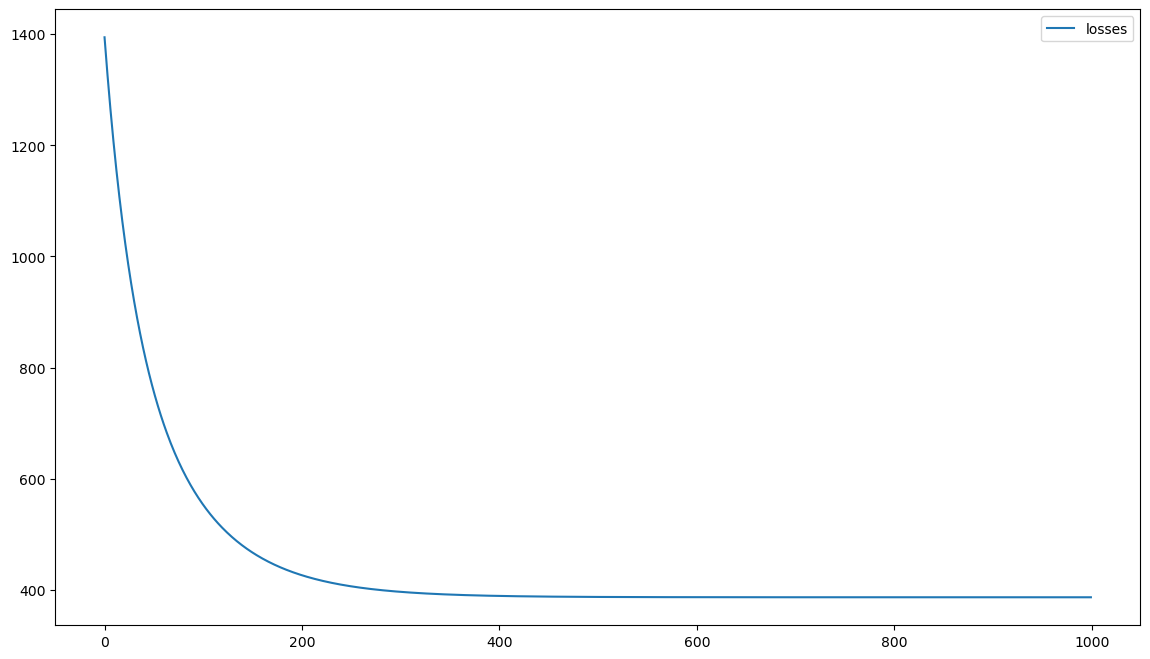

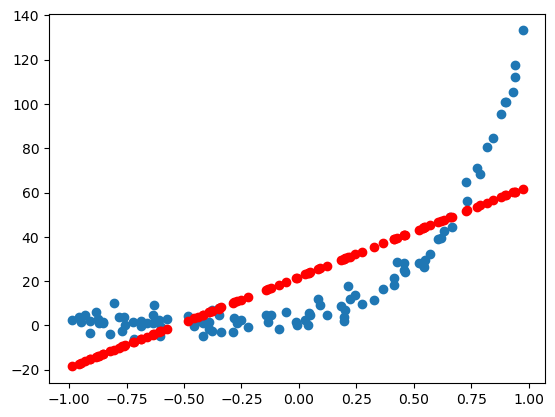

In [10]:
line_model = model_train(model, optimizer, X, Y)
with torch.no_grad():   
    y_pred = line_model(X)
    plt.scatter(df['x'], df['y'])
    plt.scatter(df['x'], y_pred, color='red')
    plt.show()

# Model 2

$ y = a + b x + c x^2 $

In [11]:
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
c = torch.randn(1, requires_grad=True)

X = torch.tensor(df['x'])
Y = torch.tensor(df['y'])
weights = [a,b,c]
model = lambda x: a + b * x + c * x ** 2

# Loss

In [12]:
loss_fn = lambda y_pred, y_gt: (y_pred - y_gt).pow(2).mean() 

# Optimizer

In [13]:
optimizer = optim.SGD(weights, lr=0.01)

epoch 0: loss=1303.590
epoch 100: loss=410.942
epoch 200: loss=249.070
epoch 300: loss=186.914
epoch 400: loss=154.582
epoch 500: loss=134.091
epoch 600: loss=119.824
epoch 700: loss=109.527
epoch 800: loss=101.998
epoch 900: loss=96.470
epoch 1000: loss=92.405
epoch 1100: loss=89.414
epoch 1200: loss=87.213
epoch 1300: loss=85.593
epoch 1400: loss=84.401
epoch 1500: loss=83.524
epoch 1600: loss=82.879
epoch 1700: loss=82.403
epoch 1800: loss=82.054
epoch 1900: loss=81.797
epoch 2000: loss=81.607
epoch 2100: loss=81.468
epoch 2200: loss=81.365
epoch 2300: loss=81.290
epoch 2400: loss=81.234
epoch 2500: loss=81.194
epoch 2600: loss=81.164
epoch 2700: loss=81.141
epoch 2800: loss=81.125
epoch 2900: loss=81.113


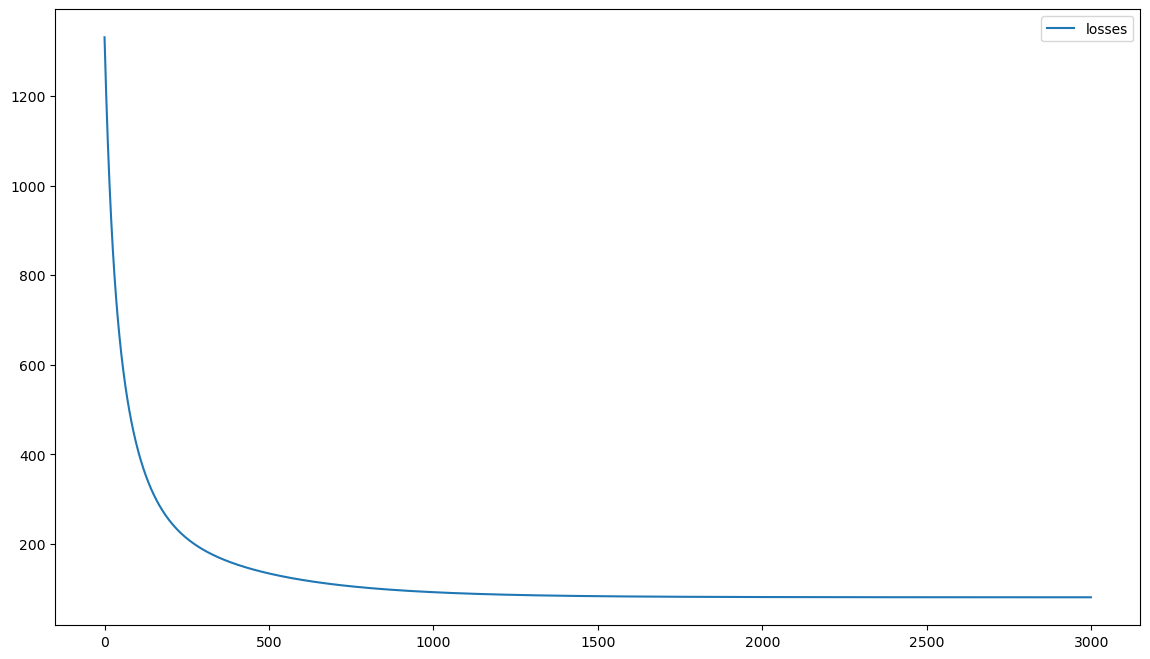

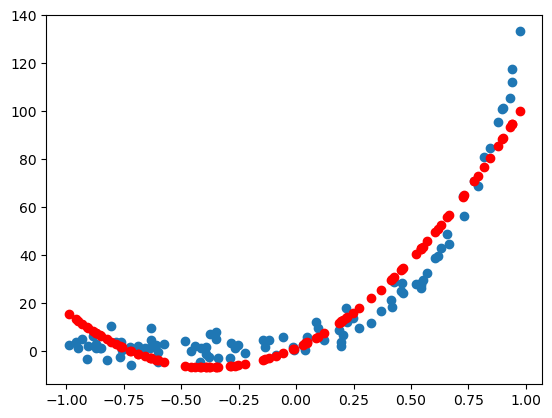

In [14]:
Quadratic_model = model_train(model, optimizer, X, Y, 3000)
with torch.no_grad():
    y_pred = Quadratic_model(X)
    plt.scatter(df['x'], df['y'])
    plt.scatter(df['x'], y_pred, color='red')
    plt.show()

# Model 3: Exponential model

$ y = a e^{b x} $

In [15]:
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
X = torch.tensor(df['x'])
Y = torch.tensor(df['y'])
weights = [a,b]
model = lambda x: a*torch.exp(b*x)

In [16]:
loss_fn = lambda y_pred, y_gt: (y_pred - y_gt).pow(2).mean()
optimizer = optim.SGD(weights, lr=0.0005)

epoch 0: loss=1200.461
epoch 100: loss=17.416
epoch 200: loss=15.927
epoch 300: loss=15.008
epoch 400: loss=14.418
epoch 500: loss=14.029
epoch 600: loss=13.767
epoch 700: loss=13.589
epoch 800: loss=13.465
epoch 900: loss=13.379
epoch 1000: loss=13.318
epoch 1100: loss=13.275
epoch 1200: loss=13.244
epoch 1300: loss=13.222
epoch 1400: loss=13.207
epoch 1500: loss=13.195
epoch 1600: loss=13.187
epoch 1700: loss=13.181
epoch 1800: loss=13.177
epoch 1900: loss=13.174


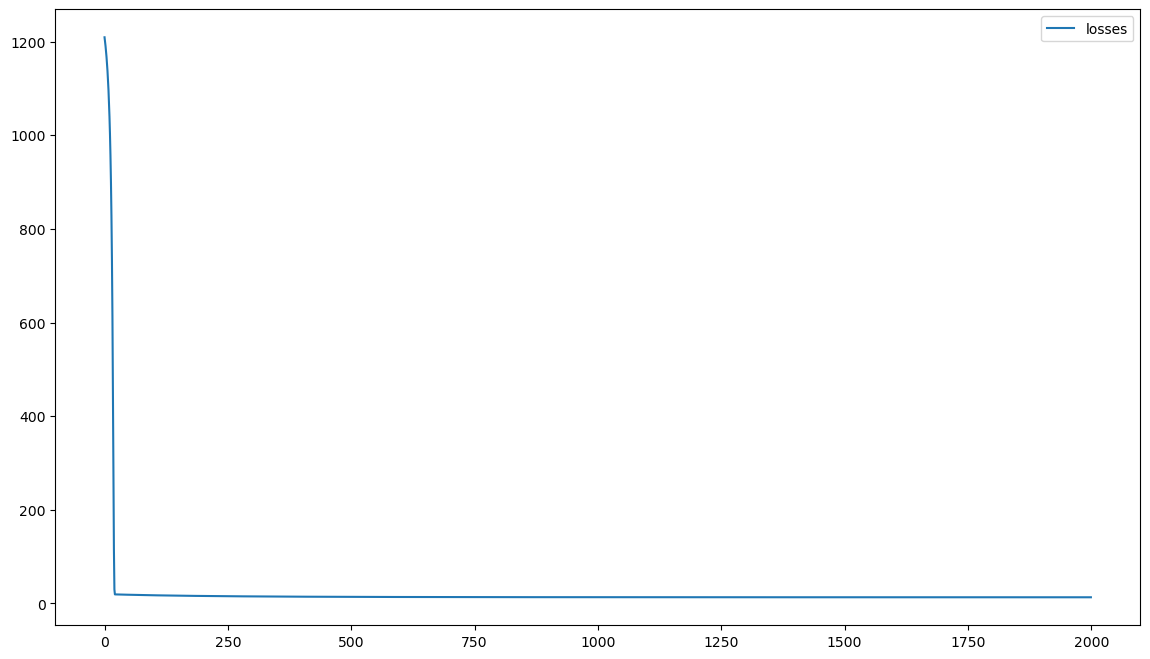

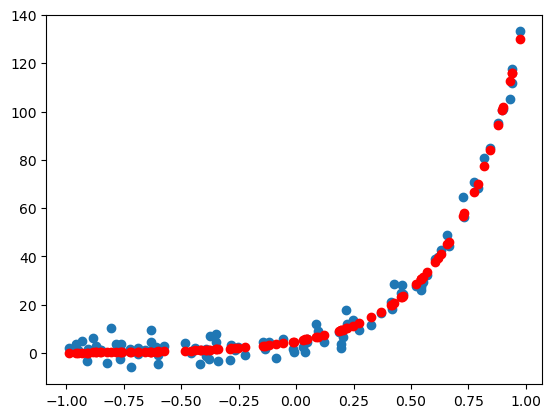

In [17]:
Exponential_model = model_train(model, optimizer, X, Y, 2000)
with torch.no_grad():
    y_pred = Exponential_model(X)
    plt.scatter(df['x'], df['y'])
    plt.scatter(df['x'], model(X).detach().numpy(), color='red')

# Model 4: MLP

In [49]:
import torch.nn.functional as F
class MLP(torch.nn.Module):
    def __init__(self, input_shape, hidden_dim, output_shape):
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(input_shape, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_shape)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.output(x)
        return x

In [57]:
X = torch.tensor(df["x"])[:, None].float()
Y = torch.tensor(df["y"])[:, None].float()

In [64]:
model = MLP(1, 16, 1)

loss_fn = lambda y_pred, y_gt: (y_pred - y_gt).pow(2).mean() 

optimizer = optim.Adam(model.parameters(), lr=0.002)

epoch 0: loss=1362.538
epoch 100: loss=506.532
epoch 200: loss=175.106
epoch 300: loss=78.860
epoch 400: loss=38.522
epoch 500: loss=21.883
epoch 600: loss=16.228
epoch 700: loss=14.397
epoch 800: loss=13.382
epoch 900: loss=12.897
epoch 1000: loss=12.612
epoch 1100: loss=12.413
epoch 1200: loss=12.269
epoch 1300: loss=12.177
epoch 1400: loss=12.101
epoch 1500: loss=12.030
epoch 1600: loss=11.954
epoch 1700: loss=11.884
epoch 1800: loss=11.808
epoch 1900: loss=11.728


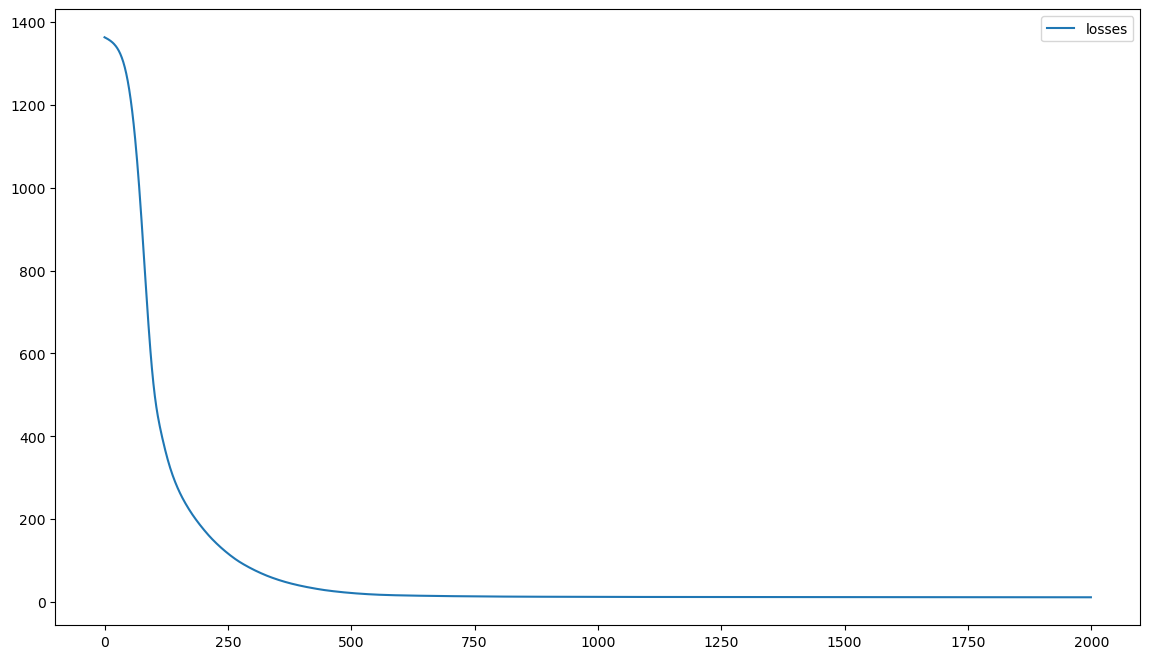

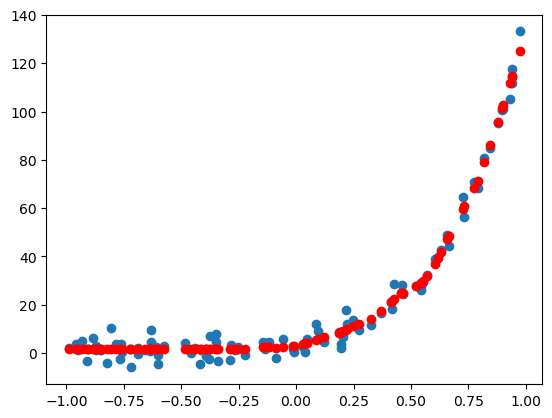

In [65]:
MLP_model = model_train(model, optimizer, X, Y, 2000)
with torch.no_grad():
    y_pred = MLP_model(X)
    plt.scatter(df['x'], df['y'])
    plt.scatter(df['x'], y_pred, color='red')
    plt.show()

The MLP reaches the least loss meaning it overfits the data to some extent. Since the shape of the data was generated from random points around the exact points of an exponential function, we know that the best fit for generalization is the exponential function. The MLP network has lower loss because it overfits the data which is not good for inference later when using the model on test data. 

As we can see from the plots, choosing the model affects clearly the model output, no matter how much training you do, the model will reach the minimum possible point and there will be no better estimation to get better results. Choosing the model may lead to either underfitting as in the case of the line function y = ax+b, or overfitting as in the case of the MLP networkl.